# Finding Heavy Traffic Indicators on I-94

In this project I figured out what are teh indicators of the heavy tarffic on I-94 Interstate highway. To do it, I used my data visualization skills I have learned in my course.

The goal is to find (a few) most common indicator(s) of heavy traffic.

In [25]:
import pandas as pd

traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
print(traffic.head())
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null 

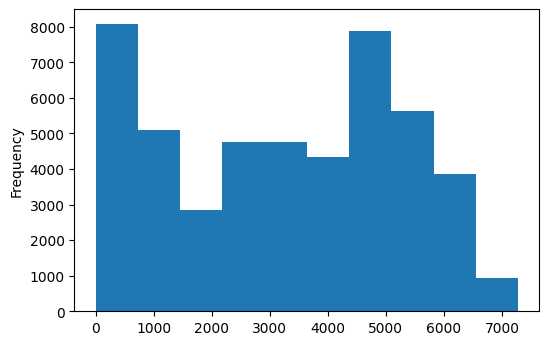

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic["traffic_volume"].plot.hist()
plt.show()
traffic["traffic_volume"].describe()

We see the range of volume between 0 to 7280 scattered per hour.
The most common values are 0-1000 and averege 5000. 

Selden we see value 2000 coming in the dataset. I can imagine it can be nighjttime traffic. During the daytime we can expect doubtless more higher traffic value.

In [27]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [28]:
traffic["date_time"].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [29]:
day = traffic.copy()[(traffic["date_time"].dt.hour >= 7)
                     & (traffic["date_time"].dt.hour < 19)]

night = traffic.copy()[(traffic["date_time"].dt.hour >= 19)
                       | (traffic["date_time"].dt.hour < 7)]
print(day.shape)
print(night.shape)

(23877, 9)
(24327, 9)


We just isolated the daytime and nighttime.
* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64 

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


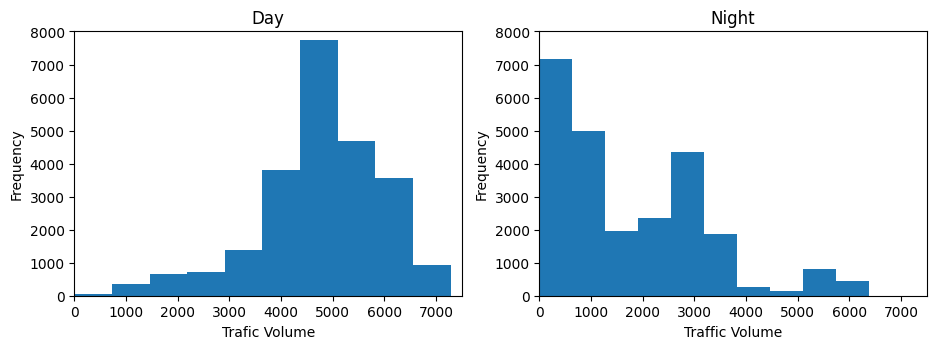

In [30]:
plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.xlabel("Trafic Volume")
plt.ylabel("Frequency")
plt.title("Day")
plt.ylim(0,8000)
plt.xlim(0, 7500)

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.title("Night")
plt.ylim(0,8000)
plt.xlim(0, 7500)

print(day["traffic_volume"].describe(), "\n")
print(night["traffic_volume"].describe())

The histogram of "Day" has skew left shape and "Night" the skew right one, which means that in the nights the traffic volume is low. 

As reminder: the goal is to determine the indicator(s) of the high traffic volume, so I decided to ignore the night traffic, because it stay's light.

### Time Indicators

* Month
* Day of the week
* Time of day

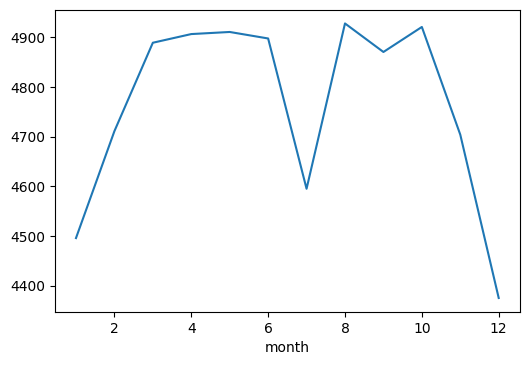

In [31]:
day["month"] = day["date_time"].dt.month
by_month = day.groupby("month").mean()
by_month["traffic_volume"].plot.line()
plt.show()

On a plot of traffic volume per month (on average) we can see 2 periodes with high traffic. February - Juni and August - Oktober. 

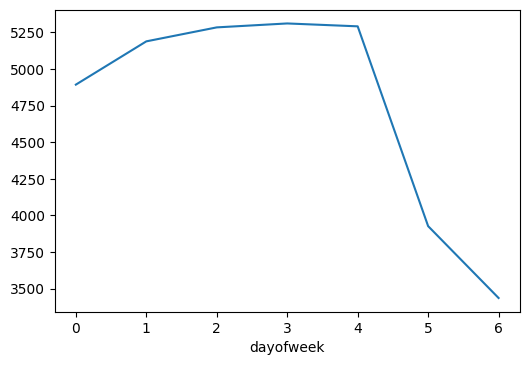

In [32]:
day["dayofweek"] = day["date_time"].dt.dayofweek
by_dayofweek = day.groupby("dayofweek").mean()
by_dayofweek["traffic_volume"].plot.line()
plt.show()

On the plot above we can see that the traffic volume is much lighter then during the business days.

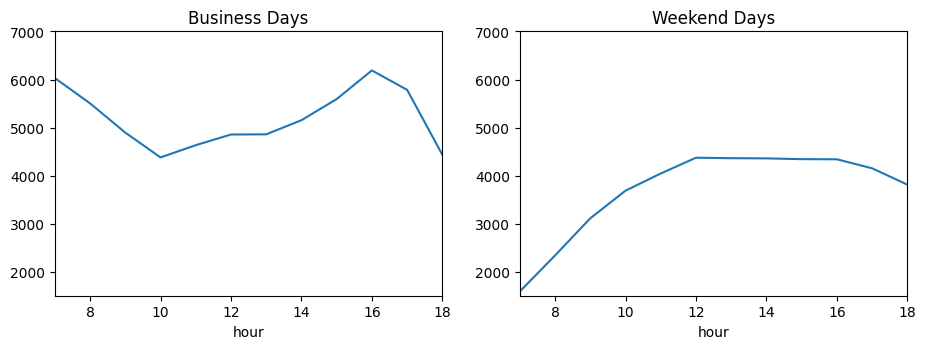

In [33]:
day["hour"] = day["date_time"].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4]
weekend_days = day.copy()[day["dayofweek"] > 4]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend_days.groupby('hour').mean()

plt.figure(figsize = (11, 3.5))

plt.subplot(1,2,1)
plt.title('Business Days')
plt.xlim(7, 18)
plt.ylim(1500, 7000)
by_hour_business['traffic_volume'].plot.line()

plt.subplot(1,2,2)
plt.title('Weekend Days')
plt.xlim(7, 18)
plt.ylim(1500, 7000)
by_hour_weekend['traffic_volume'].plot.line()

plt.show()

On the plots above we clearly can see that the traffic volume is much lighter on the weekend days.

On the business days we can see the rush at 7 A.M. and 18 P.M.
I can imagine the traffic is higher because people go to work in the morning an go home in the evening. At this 2 moments is the traffic volume the most high.

During the day the volume stay's in average between 4500 and 5500.

In [36]:
day.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

On correlation tabel we can see the "temp" column has the strongest correlation to traffic volume, so lets focus forward on this.

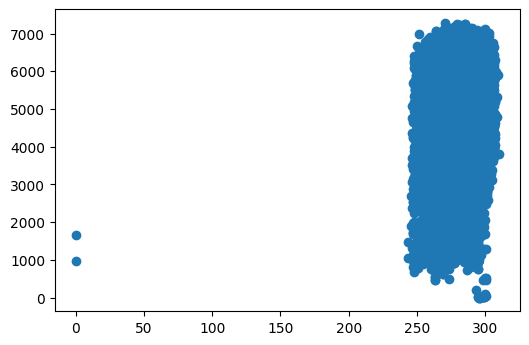

In [39]:
plt.scatter(day['temp'],day['traffic_volume'])

Even the column with the strongest correlation doesn't seem like realible idicator, so the weather doesn't have any influence to the taffic volume.

Lets take a look to 'weather_main' and 'weather_description' columns. We will calculate the mean values per category of the weather to see if it has any relation to traffic_volume.

In [41]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

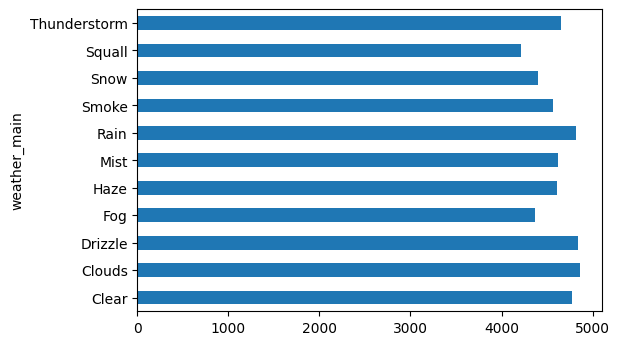

In [47]:
by_weather_main['traffic_volume'].plot.barh()

As we can see on the bar, no weather category exceeds the traffic value of 5.000 cars and the traffic seems to be in average same.

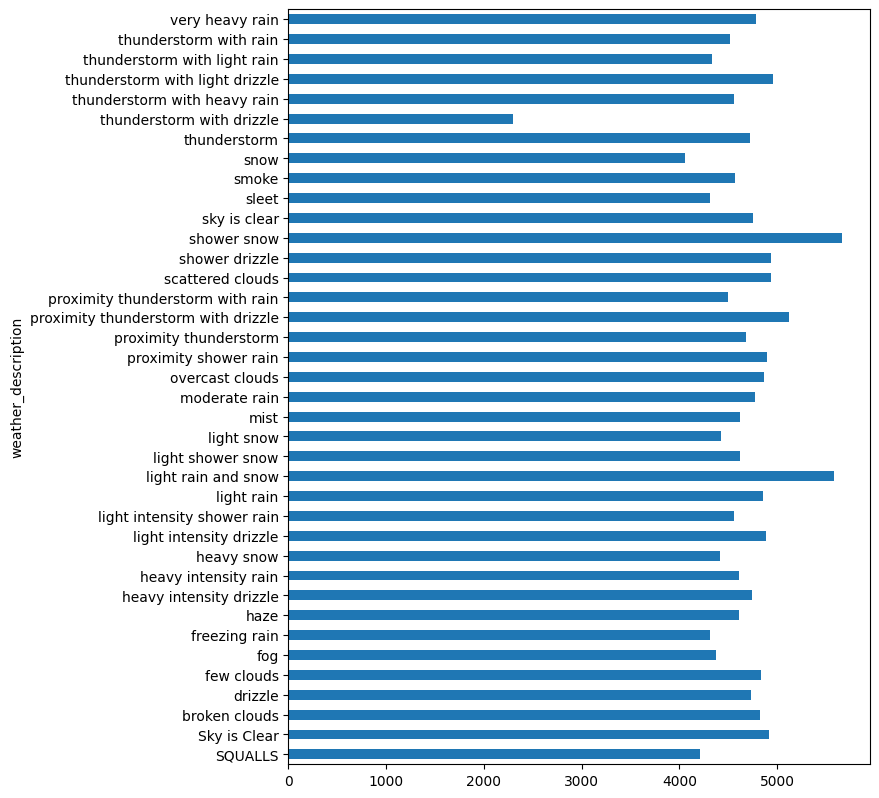

In [61]:
by_weather_description['traffic_volume'].plot.barh(figsize = (7.5, 10))

Here we can see 2 weather indicators that exceed 5000 cars. These are: 'Shower Snow' and 'Light Rain And Snow'.

I can imagine that while this weather you better can ride slowly to avoind any incident with the car. Finaly you get a traffic jam. That's why the traffic volume is so heavy at that moment.



## Summary of the project

After some good research of the data I found any indicators of the heavy traffic on I-94 Highway. 

The indicators are:

- Period of the year (In the warm monthes are more cars on the way)
- The time (In the day time the traffic is heavier)
- The type of day (Business days have heigher traffic volume)
- The weather indicatos (While 'dangurous wether' is the traffic even heigher then 5.000 cars).

Thanks for looking to my project. Follow me for more handly and interesting projects!